<img src='http://www-scf.usc.edu/~ghasemig/images/sharif.png' alt="SUT logo" width=300 height=300 align=left class="saturate" >

<br>
<font>
<div dir=ltr align=center>
<font color=0F5298 size=7>
    Artificial Intelligence <br>
<font color=2565AE size=5>
    Computer Engineering Department <br>
    Spring 2023<br>
<font color=3C99D size=5>
    Practical Assignment 3 - Reinforcement Learning <br>
<font color=696880 size=4>
    Mohammad Moshtaghi - Ali Salesi - Hossein Goli

____

# Personal Data

In [ ]:
# Set your student number
student_number = '98170646'
first_name = 'Mohammadreza'
last_name = 'Ahmadi Teshnizi'

In [ ]:
!pip install gym[toy_text]

import gym 
import numpy as np
from IPython.display import clear_output
import matplotlib.pyplot as plt
import os
from tqdm import trange
os.environ["SDL_VIDEODRIVER"] = "dummy"
clear_output() # You can use this method to clear your cell's output. 

# Q1: Q-Learning (100 Points)

<font size=4>
Author: Mohammad Moshtaghi
<br/>
<font color=red>
Please run all the cells.
</font>
</font>
<br/>
</div>

# 1. Cliff Walking (70 pts)

In this section we are going to implement different Temporal Difference algorithms and compare their results. We start with a simple problem called **Cliff Walking**. You may have seen this game in your lecture slides and here we are going to train an RL Agent to play this game optimally.

First, lets get familiar with game's environment.

## 1-1. Environment (10 pts)

Lets declare our environment and see some of its hyperparameters.

In [ ]:
env = gym.make('CliffWalking-v0')
spec = gym.spec('CliffWalking-v0')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(4)
Observation Space: Discrete(48)
Max Episode Steps: None
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: None



In [ ]:
Actions =  {0: 'UP', 
            1: 'RIGHT',
            2: 'DOWN',
            3: 'LEFT'}

You can use **_visualize_** function to draw your state.

In [ ]:
def visualize(env, action=None, reward=None):
    env_screen = env.render(mode = 'rgb_array')
    plt.imshow(env_screen)
    plt.axis('off');
    title = ''
    if action:
        title += f'Action: {Actions[action]}'
    if reward:
        title += f'Reward: {reward}'
    
    plt.title(title)
    plt.show()

Test `visualize` function with a random action. First, using `env.reset` function, we reset our environment so that our agent returns to the starting point. for moving your agent, use `env.step` function. it returns four values:

1. next_state
2. reward
3. done
4. some info (Honestly, it doesn't matter)

You may need this functions later :)



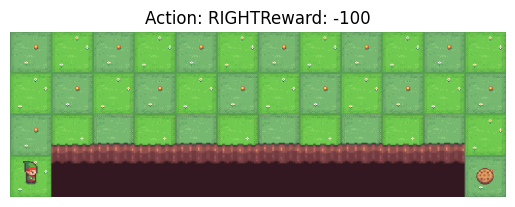

In [ ]:
# Reset environment
state = env.reset()

# Take a random action
action = env.action_space.sample()
next_state, reward, done, _ = env.step(action)

# Visualize the state
visualize(env, action, reward)


## 1-2. Agent

Please read the class below. You must inherite this class in the following sections and implement different RL algorithms.

In [ ]:
class Agent:

    def __init__(self, env, noise):
        self.q_values = np.zeros((env.observation_space.n, env.action_space.n))
        self.policy = {}
        self.env = env
        self.noise = noise

    def learn(self, num_episodes, alpha, gamma, epsilon):
        """
        Implement your Reinforcement Learning algorithm and train your agent in this function. 
        At the end, you must fill the q_values array.

        Inputs:
            - alpha: Learning rate
            - gamma: Discount factor
            - epsilon: The probability that the agent will act randomly instead of greedy in sampling.
        """

        raise NotImplementedError()
    
    def create_policy(self):
        for state in range(self.env.observation_space.n):
            self.policy[state] = np.argmax(self.q_values[state])

    def act(self, state):
        """
        Move your agent one step according to your policy.
        """
        if np.random.uniform() < self.noise:
            return self.env.action_space.sample()
        return self.policy[state] 

    def evaluate(self, num_episodes):
        """
        Sample num_episodes episodes from your agent that acts according to your policy.
        Then return the average rewards it gets.

        Inputs:
            - num_episodes: Number of episodes for sampling.
        """
        rewards = []
        for i in range(num_episodes):
            state = self.env.reset()
            total_reward = 0
            done = False
            while not done:
                action = self.act(state)
                next_state, reward, done, _ = self.env.step(action)
                total_reward += reward
                state = next_state
            rewards.append(total_reward)
        return np.mean(rewards)


## 1-3. Q-Learning (15 pts)

In this section, you must use **_Q-Learning_** algorithm to train your agent. Note that the action-value function Q(s,a) is updated iteratively as follows:

$$ Q(s,a) \leftarrow Q(s,a) + \alpha \left( r + \gamma \max_{a'} Q(s',a') - Q(s,a) \right) $$

where ‍‍‍‍‍`r` is the reward received after taking action a in state `s`, `s'` is the new state, $\gamma$ is the discount factor (a value between 0 and 1 that determines the importance of future rewards), and $\alpha$ is the learning rate (determines the step size at which the value function is updated).

In [ ]:
class CliffWalkerQL(Agent):
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        for i in trange(num_episodes):
            state = self.env.reset()
            done = False
            while not done:
                # Choose action using epsilon-greedy policy
                if np.random.uniform() < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(self.q_values[state])

                # Take a step in the environment
                next_state, reward, done, _ = self.env.step(action)

                # Update Q-value using Q-Learning algorithm
                td_target = reward + gamma * np.max(self.q_values[next_state])
                td_error = td_target - self.q_values[state][action]
                self.q_values[state][action] += alpha * td_error

                # Update state
                state = next_state
        self.create_policy()

## 1-4. Q-Learning Evaluation (10 pts)

Train your agent and then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [ ]:
cliff_walker_ql = CliffWalkerQL(env, 0)
alpha = 0.8
gamma = 0.95
epsilon = 0.2
episodes = 1000
cliff_walker_ql.learn(episodes, alpha, gamma, epsilon)

100%|██████████| 1000/1000 [00:00<00:00, 1061.96it/s]


Average reward over 10 episodes: -13.0


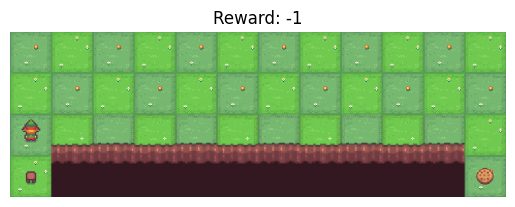

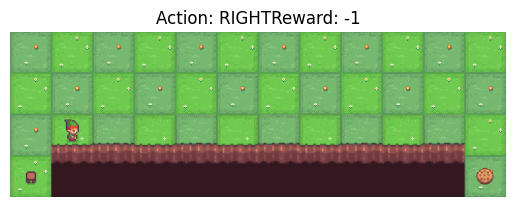

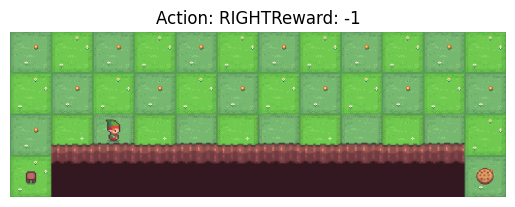

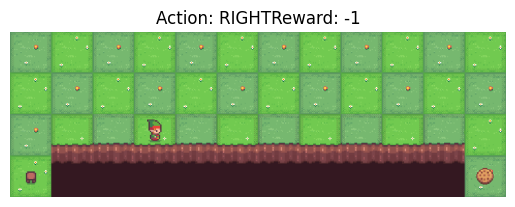

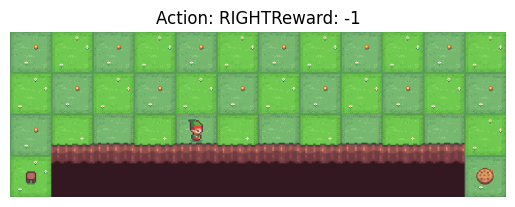

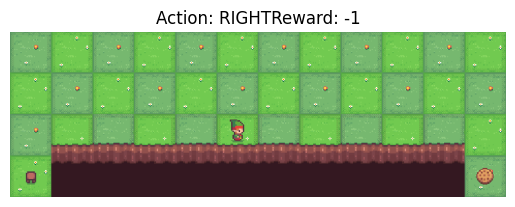

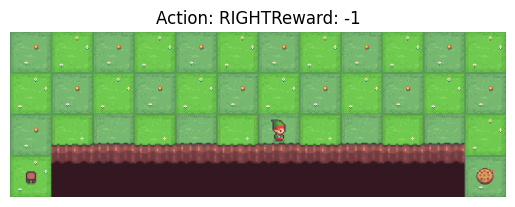

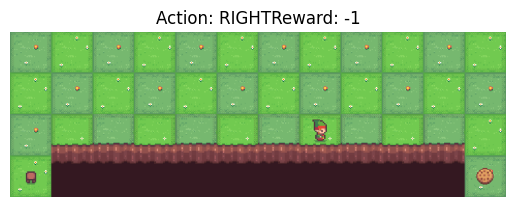

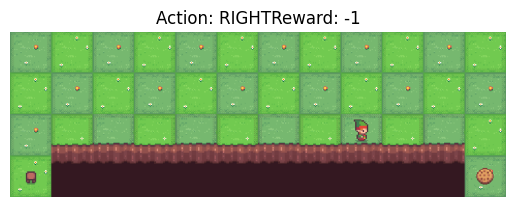

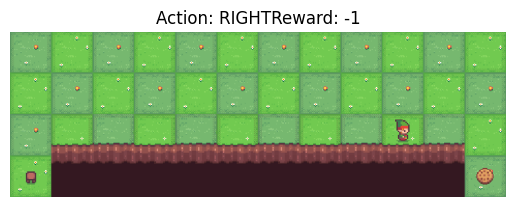

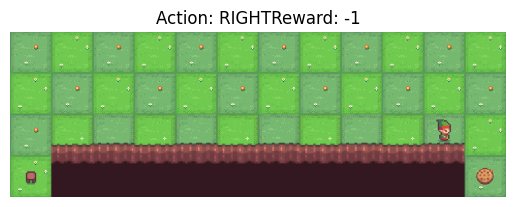

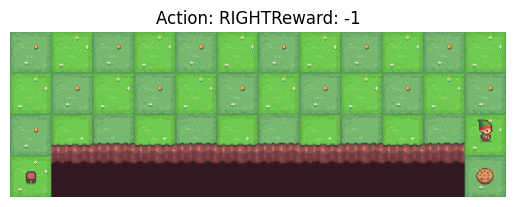

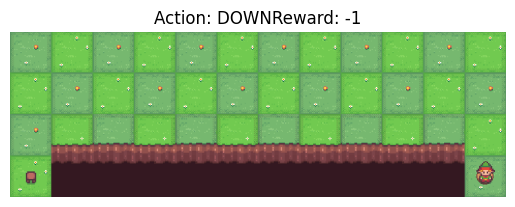

In [ ]:

# Evaluate the agent
num_eval_episodes = 10
average_reward = cliff_walker_ql.evaluate(num_eval_episodes)
print(f"Average reward over {num_eval_episodes} episodes: {average_reward}")

# Visualize one of the episodes
state = env.reset()
done = False
while not done:
    action = cliff_walker_ql.act(state)
    next_state, reward, done, _ = env.step(action)
    visualize(env, action, reward)
    state = next_state


## 1-5. SARSA (15 pts)

This time, you should use the SARSA algorithm, which is slightly different from the Q-Learning in implementation. But the result may significantly differ, and you should explain this difference, if any. 

Note that the SARSA update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.

In [ ]:
class CliffWalkerSARSA(Agent):

    def learn(self, num_episodes, alpha, gamma, epsilon):
        for i in trange(num_episodes):
            state = self.env.reset()
            done = False
            # Choose action using epsilon-greedy policy
            if np.random.uniform() < epsilon:
                action = self.env.action_space.sample()
            else:
                action = np.argmax(self.q_values[state])
                
            while not done:
                # Take a step in the environment
                next_state, reward, done, _ = self.env.step(action)

                # Choose next action using epsilon-greedy policy
                if np.random.uniform() < epsilon:
                    next_action = self.env.action_space.sample()
                else:
                    next_action = np.argmax(self.q_values[next_state])

                # Update Q-value using SARSA algorithm
                td_target = reward + gamma * self.q_values[next_state][next_action]
                td_error = td_target - self.q_values[state][action]
                self.q_values[state][action] += alpha * td_error

                # Update state and action
                state = next_state
                action = next_action
        self.create_policy()


## 1-6. SARSA Evaluation (10 pts)

Train your agent and then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [ ]:
cliff_walker_sarsa = CliffWalkerSARSA(env, 0)
alpha = 0.1
gamma = 0.9
epsilon = 0.4
episodes = 1000
cliff_walker_sarsa.learn(episodes, alpha, gamma, epsilon)

100%|██████████| 1000/1000 [00:01<00:00, 790.27it/s]


Average reward over 100 episodes: -17.0


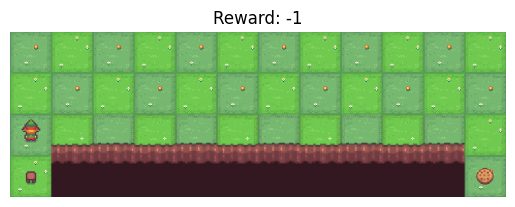

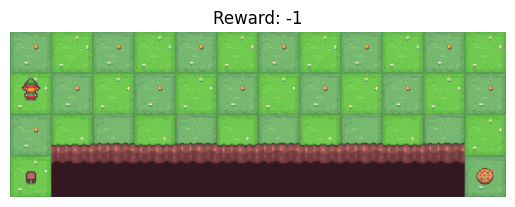

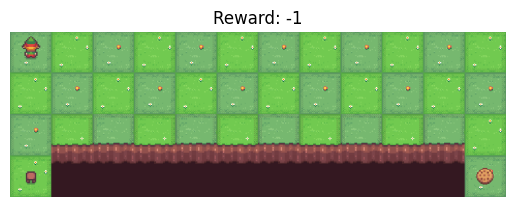

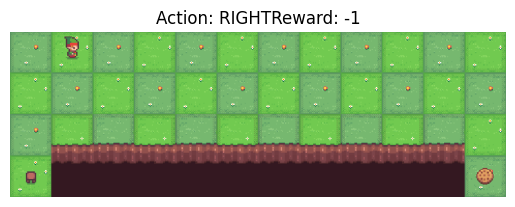

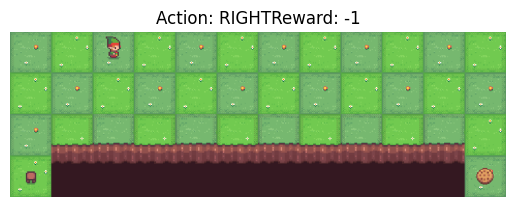

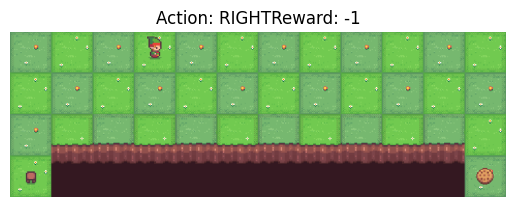

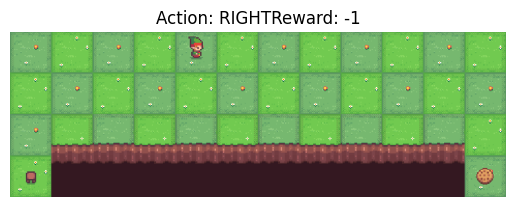

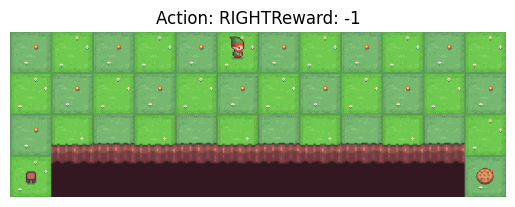

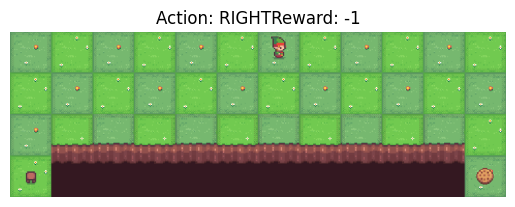

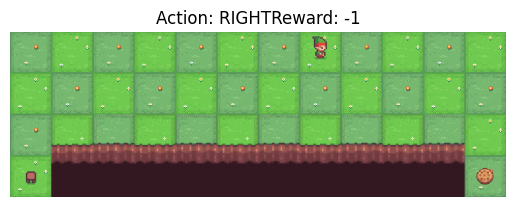

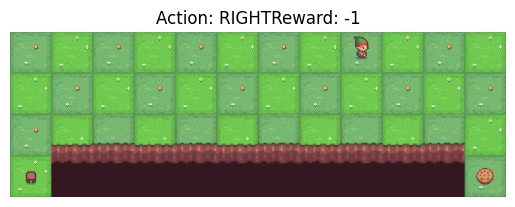

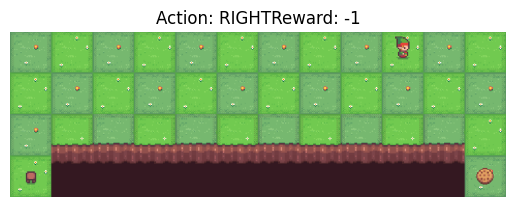

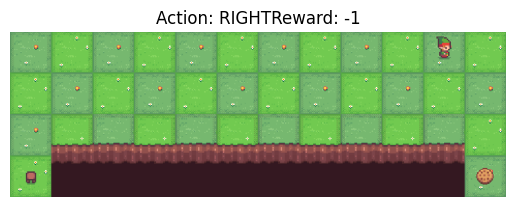

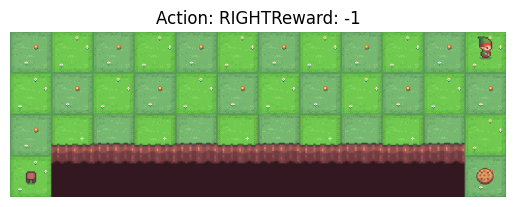

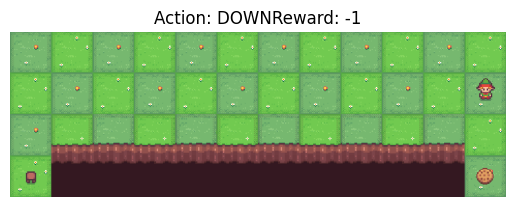

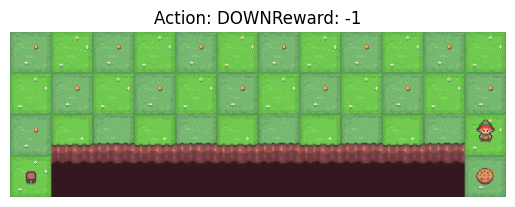

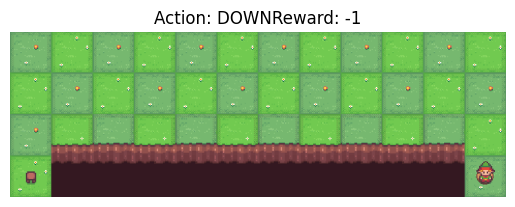

In [ ]:
num_episodes = 100
avg_reward = cliff_walker_sarsa.evaluate(num_episodes)
print(f"Average reward over {num_episodes} episodes: {avg_reward}")

# Visualize the path taken by the agent in one episode
state = env.reset()
done = False
while not done:
    action = cliff_walker_sarsa.act(state)
    next_state, reward, done, _ = env.step(action)
    visualize(env, action, reward)
    state = next_state

## 1-7. Increase Noises (10 pts)

Increase noise and see how your obtained policy changes. Do this for both above algorithms and repeat above steps.

In [ ]:
# Increase noise and see how the policy changes
epsilon = 0.5
cliff_walker_ql = CliffWalkerQL(env, 0)
alpha = 0.8
gamma = 0.95
episodes = 1000
cliff_walker_ql.learn(episodes, alpha, gamma, epsilon)

# Evaluate the agent
num_eval_episodes = 10
average_reward = cliff_walker_ql.evaluate(num_eval_episodes)
print(f"Average reward over {num_eval_episodes} episodes: {average_reward}")

# Visualize one of the episodes
state = env.reset()
done = False
while not done:
    action = cliff_walker_ql.act(state)
    next_state, reward, done, _ = env.step(action)
    visualize(env, action, reward)
    state = next_state



In [ ]:
# Increase noise and see how the policy changes
epsilon = 0.7
cliff_walker_sarsa = CliffWalkerSARSA(env, 0)
alpha = 0.1
gamma = 0.9
episodes = 1000
cliff_walker_sarsa.learn(episodes, alpha, gamma, epsilon)

num_episodes = 100
avg_reward = cliff_walker_sarsa.evaluate(num_episodes)
print(f"Average reward over {num_episodes} episodes: {avg_reward}")

# Visualize the path taken by the agent in one episode
state = env.reset()
done = False
while not done:
    action = cliff_walker_sarsa.act(state)
    next_state, reward, done, _ = env.step(action)
    visualize(env, action, reward)
    state = next_state


100%|██████████| 1000/1000 [00:36<00:00, 27.52it/s]


KeyboardInterrupt: ignored

# 2. Taxi Driver (30 pts)

**The** next game that we want to implement is **Taxi Driver**. 

## 2-1. Environment

In [ ]:
env = gym.make('Taxi-v3')
spec = gym.spec('Taxi-v3')

print(f"Action Space: {env.action_space}")
print(f"Observation Space: {env.observation_space}")
print(f"Max Episode Steps: {spec.max_episode_steps}")
print(f"Nondeterministic: {spec.nondeterministic}")
print(f"Reward Range: {env.reward_range}")
print(f"Reward Threshold: {spec.reward_threshold}\n")

Action Space: Discrete(6)
Observation Space: Discrete(500)
Max Episode Steps: 200
Nondeterministic: False
Reward Range: (-inf, inf)
Reward Threshold: 8



In [ ]:
Actions =  {0: 'DOWN', 
            1: 'UP',
            2: 'RIGHT',
            3: 'LEFT',
            4: 'Pickup passenger',
            5: 'Drop off passenger'}

You can read more about the game and its observation space in this [link](https://gymnasium.farama.org/environments/toy_text/taxi/#observation-space).



## 2-2. Q-Learning (5 pts)

Implement Q-Learning algorithm for this problem. (Of course, you can use the code you implemented in the previous section and just enjoy the result (: )

In [ ]:

class TaxiQL(Agent):
    def __init__(self, env, noise=0):
        super().__init__(env, noise)
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        # Initialize the Q-table to all zeros
        Q = np.zeros((self.env.observation_space.n, self.env.action_space.n))

        # For each episode
        for i in range(num_episodes):
            # Reset the environment to the initial state
            state = self.env.reset()

            # Choose an action using an epsilon-greedy policy based on the Q-values
            if np.random.rand() < epsilon:
                action = self.env.action_space.sample()
            else:
                action = np.argmax(Q[state])

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, info = self.env.step(action)

            # Update the Q-value for the current state-action pair using the Q-Learning update rule
            Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]))

            # Update the state
            state = next_state

            # Repeat steps b-d until the episode ends
            while not done:
                if np.random.rand() < epsilon:
                    action = self.env.action_space.sample()
                else:
                    action = np.argmax(Q[state])

                next_state, reward, done, info = self.env.step(action)

                Q[state, action] = (1 - alpha) * Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]))

                state = next_state

        # Return the learned Q-table
        return Q


In [ ]:
import os
import gym



def visualize_episodes(env, Q, num_episodes):
    # For each episode
    for i in range(num_episodes):
        # Reset the environment to the initial state
        state = env.reset()

        # Render the initial state
        visualize(env)

        # Follow the policy until the episode terminates
        done = False
        while not done:
            # Choose the action with the highest Q-value for the current state
            action = np.argmax(Q[state])

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, info = env.step(action)

            # Update the state
            state = next_state

            # Render the updated state
            visualize(env, action, reward)
            
def evaluate_agent(env, Q, num_episodes):
    # Keep track of the total rewards obtained in all episodes
    total_rewards = 0

    # For each episode
    for i in range(num_episodes):
        # Reset the environment to the initial state
        state = env.reset()

        # Follow the policy until the episode terminates
        done = False
        while not done:
            # Choose the action with the highest Q-value for the current state
            action = np.argmax(Q[state])

            # Take the chosen action and observe the next state and reward
            next_state, reward, done, info = env.step(action)

            # Update the total rewards obtained in this episode
            total_rewards += reward

            # Update the state
            state = next_state

    # Compute the average reward per episode
    avg_reward = total_rewards / num_episodes

    # Print the average reward per episode
    print(f"Average Reward per Episode: {avg_reward}")

    


## 2-3. Q-Learning Evaluation (5 pts) 

Train your agent two times, once with 1000 episodes and once with 10000 episodes. Then evaluate it and display the result. Using the `visualize` function, show the path your agent takes in one of the episodes.

In [224]:
import gym
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create the environment
env = gym.make('Taxi-v3')

# Train the agent with 1000 episodes
agent1 = TaxiQL(env)
Q1 = agent1.learn(num_episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1)

# Evaluate the agent with 100 episodes
evaluate_agent(env, Q1, num_episodes=100)

# Visualize the agent's path in one of the episodes
# visualize_episodes(env, Q1, num_episodes=1)

# Train the agent with 10000 episodes
agent2 = TaxiQL(env)
Q2 = agent2.learn(num_episodes=10000, alpha=0.1, gamma=0.99, epsilon=0.1)

# Evaluate the agent with 100 episodes
evaluate_agent(env, Q2, num_episodes=100)

# Visualize the agent's path in one of the episodes
# visualize_episodes(env, Q2, num_episodes=1)


Average Reward per Episode: -126.91
Average Reward per Episode: 7.96


## 2-4. TD(2) (15 pts)

In this section, you have to implement the Taxi problem using TD(2) algorithm. The difference between this method and the previous methods is in the number of movements that we look from the future.

For example, the SARSA TD(2) update rule can be represented as:

$$Q(S_t,A_t) \leftarrow Q(S_t,A_t) + \alpha \left( R_{t+1} + \gamma Q(S_{t+1},A_{t+1}) + \gamma^2 Q(s_{t+2},A_{t+2}) - Q(S_t,A_t) \right)$$


Where $Q(S_t,A_t)$ is the current estimate of the expected return for taking action $A_t$ in state $S_t$, $\alpha$ is the learning rate, $R_{t+1}$ is the reward received after taking action $A_t$ in state $S_t$, $\gamma$ is the discount factor, and $Q(S_{t+1},A_{t+1})$ is the estimated return for taking action $A_{t+1}$ in the next state $S_{t+1}$.

You can see [this video](https://youtu.be/AJiG3ykOxmY) for more details about TD methods.

In [ ]:
class TaxiTD2(Agent):
    
    def learn(self, num_episodes, alpha, gamma, epsilon):
        ######################## YOUR CODE HERE ########################
        #خسته شدم بابا چرا انقدر طولانی#
        ######################## END YOUR CODE #########################
        pass

## 2-5. TD(2) Evaluation (5 pts)

In [ ]:
taxi_td2 = TaxiTD2(env, 0)
alpha = 0
gamma = 0
epsilon = 0
episodes = 1000
taxi_td2.learn(episodes, alpha, gamma, epsilon)

In [ ]:
######################## YOUR CODE HERE ########################

######################## END YOUR CODE #########################

You can see that the TD(2) method can reach an acceptable policy faster. Try to explain why.